<a href="https://colab.research.google.com/github/Pri12-3/task/blob/main/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install scikit-learn matplotlib seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
print("Ready!")

Ready!


In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42, stratify=y_train_full)
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_val_flat = X_val.reshape(X_val.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0
print(f"Train: {X_train_flat.shape}, Val: {X_val_flat.shape}, Test: {X_test_flat.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: (54000, 784), Val: (6000, 784), Test: (10000, 784)


In [ ]:

rf = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', n_jobs=-1, random_state=42)
rf.fit(X_train_flat, y_train)
print("Model trained!")

Model trained!


In [ ]:
y_val_pred = rf.predict(X_val_flat)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.9645
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       592
           1       0.97      0.99      0.98       674
           2       0.96      0.97      0.97       596
           3       0.96      0.95      0.95       613
           4       0.97      0.97      0.97       584
           5       0.97      0.96      0.97       542
           6       0.98      0.97      0.98       592
           7       0.98      0.96      0.97       627
           8       0.94      0.94      0.94       585
           9       0.94      0.94      0.94       595

    accuracy                           0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000



Test Accuracy: 0.9666


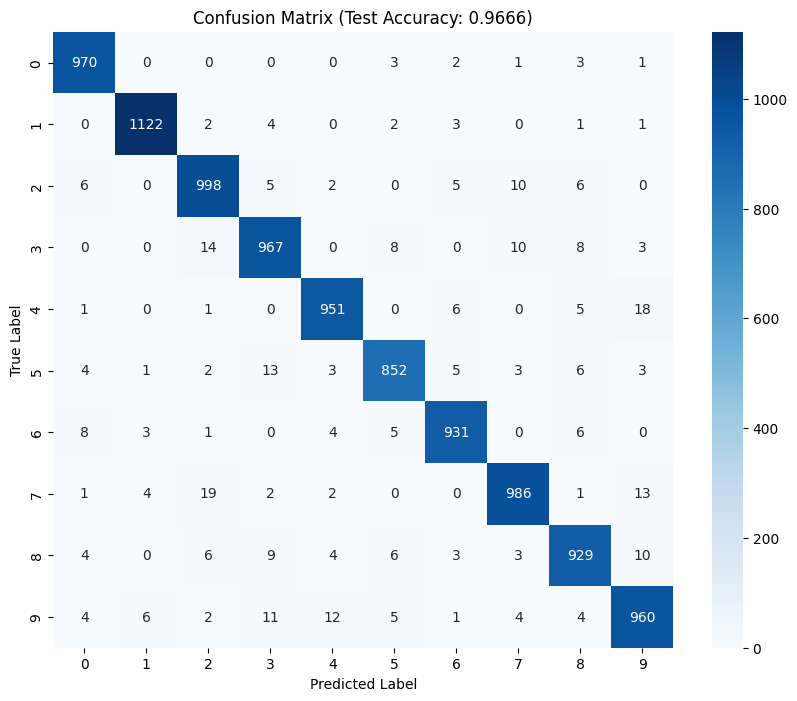

In [ ]:
y_test_pred = rf.predict(X_test_flat)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix (Test Accuracy: {test_accuracy:.4f})')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

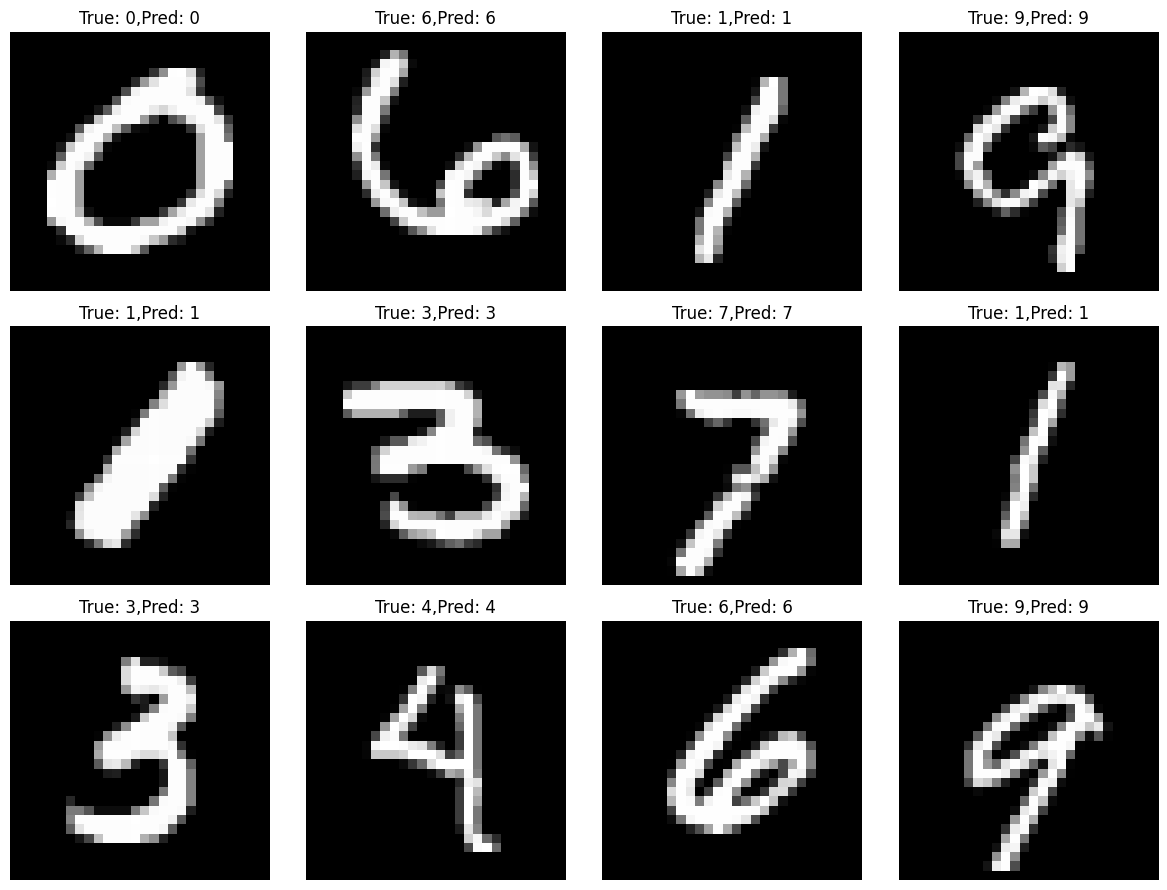

In [ ]:

def plot_predictions(X, y_true, y_pred, n_images=12):
    n_show = min(n_images, len(X))
    fig, axes = plt.subplots(3, 4, figsize=(12, 9))
    axes = axes.ravel()
    indices = np.random.choice(len(X), n_show, replace=False)
    for idx, i in enumerate(indices):
        axes[idx].imshow(X[i].reshape(28, 28), cmap='gray')
        axes[idx].set_title(f'True: {y_true[i]},Pred: {y_pred[i]}')
        axes[idx].axis('off')
    plt.tight_layout()
    plt.show()

plot_predictions(X_test, y_test, y_test_pred)